In [1]:
from my_utils import loader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import importlib
import numpy as np
importlib.reload(loader)

<module 'my_utils.loader' from '/workspaces/Thesis/Gaze_4_behavioural_biometrics/my_utils/loader.py'>

In [2]:
import warnings;
warnings.filterwarnings('ignore');

Credits to [this notebook](https://goldinlocks.github.io/Bayesian-logistic-regression-with-pymc3/)

In [3]:
def get_df_features(features_train, features_test, labels_train, labels_test, fix= True):
    if fix:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "dur",
                "pupil_diam_left",
                "pupil_diam_right"
        ]
    else:
        features = [
                "B_00",
                "B_01",
                "B_11",
                "B_sd_00",
                "B_sd_01",
                "B_sd_11",
                "Sigma_00",
                "Sigma_01",
                "Sigma_11",
                "Sigma_sd_00",
                "Sigma_sd_01",
                "Sigma_sd_11",
                "angle",
                "ampl",
                "dur",
                "pupil_diam_left",
                "pupil_diam_right"
        ]
    features_train = pd.DataFrame(features_train)
    features_train.columns = features
    features_train["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_train]
    features_test = pd.DataFrame(features_test)
    features_test.columns = features
    features_test["empathy"] = [1 if level > labels_train.mean() else 0 for level in labels_test]
    return features_train, features_test


In [4]:
def plot_correlations(df):
    n_fts = len(df.columns)
    colors = cm.rainbow(np.linspace(0, 1, n_fts))
    df.drop('empathy',axis=1).corrwith(df.empathy).sort_values(ascending=True).plot(kind='barh', color=colors, figsize=(10, 4))
    plt.title('Correlation to Target (empathy)')
    plt.show()
    print('\n',df.drop('empathy',axis=1).corrwith(df.empathy).sort_values(ascending=False))

In [5]:
def plot_class_frequencies(df):
    total = len(df)
    plt.figure(figsize=(7,5))
    g = sns.countplot(x='empathy', data=df)

    g.set_ylabel('Count', fontsize=14)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 1.5, 
                f"{(int(height/total*100))}%",
                ha="center", fontsize=14, fontweight='bold')
    plt.margins(y=0.1)
    plt.show()
    return g

## __Free Viewing__

### __General empathy__

#### __Fixations__

In [6]:
free_fix_features_train, free_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
free_fix_features_test, free_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_fix_features_df_train, free_fix_features_df_test = get_df_features(free_fix_features_train, free_fix_features_test, free_fix_labels_train, free_fix_labels_test)
free_fix_features_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


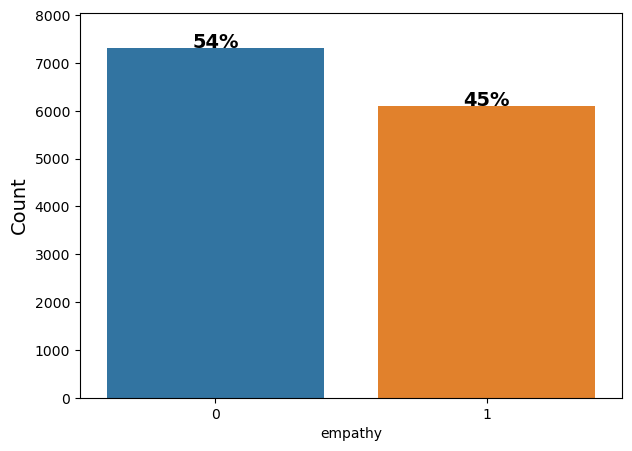

In [7]:
g = plot_class_frequencies(free_fix_features_df_train);

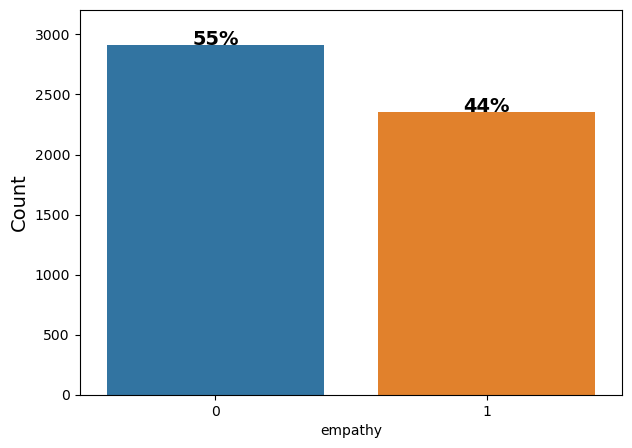

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [8]:
plot_class_frequencies(free_fix_features_df_test)

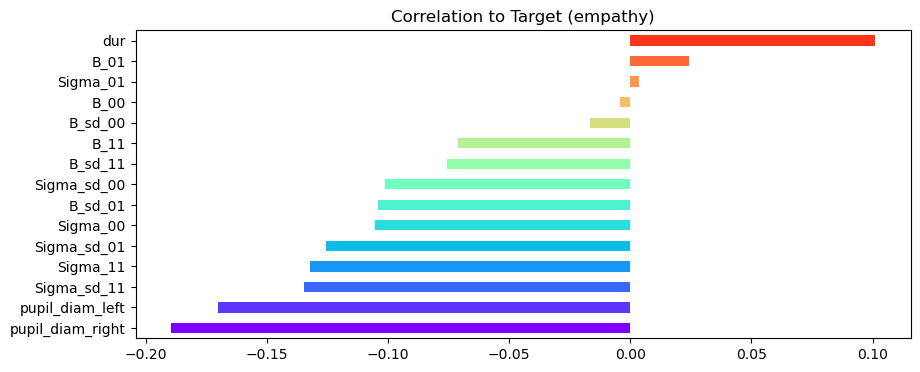


 dur                 0.101149
B_01                0.024168
Sigma_01            0.003702
B_00               -0.004357
B_sd_00            -0.016655
B_11               -0.070972
B_sd_11            -0.075618
Sigma_sd_00        -0.101370
B_sd_01            -0.103918
Sigma_00           -0.105194
Sigma_sd_01        -0.125669
Sigma_11           -0.132083
Sigma_sd_11        -0.134780
pupil_diam_left    -0.170267
pupil_diam_right   -0.189593
dtype: float64


In [9]:
plot_correlations(free_fix_features_df_train)

#### __Saccades__

In [10]:
_, _, free_sac_features_train, free_sac_labels_train = loader.get_eyeT_features_and_labels("train", "free", normalize=False)
_, _, free_sac_features_test, free_sac_labels_test = loader.get_eyeT_features_and_labels("test", "free", normalize=False)
free_sac_features_df_train, free_sac_features_df_test = get_df_features(free_sac_features_train, free_sac_features_test, free_sac_labels_train, free_sac_labels_test, fix=False)
free_sac_features_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.267404,-0.062063,0.393935,0.221068,0.151942,0.334570,19043.765563,587.397127,28616.579086,11211.996583,330.729936,15666.190783,32.005383,66.037868,0.033333,3.750,3.550,1
1,4.038522,-3.252532,3.288455,1.096619,0.876793,1.418526,22345.768371,-628.266373,38460.514960,10108.553184,317.633896,17682.699687,-21.072727,116.811814,0.041667,3.590,3.720,1
2,0.977165,0.947107,3.275761,0.205921,0.259758,1.061665,1168.263115,93.573391,11337.827852,777.609148,84.195021,6031.143676,-153.239401,131.034347,0.050000,3.555,3.540,1
3,1.461892,1.101030,3.730387,0.597207,0.425156,1.521754,31678.815782,532.524847,19891.663734,14469.355813,351.189790,9287.743565,-146.633634,196.367003,0.083333,3.325,3.435,1
4,0.486348,-2.011505,10.964955,0.235941,0.593969,3.164296,50535.142650,-700.083689,8330.121751,18390.111825,230.441191,4819.837024,98.759701,321.753011,0.041667,3.385,3.260,1


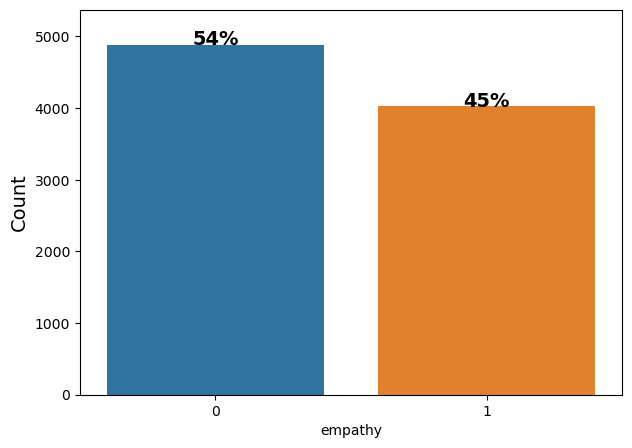

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [11]:
plot_class_frequencies(free_sac_features_df_train)

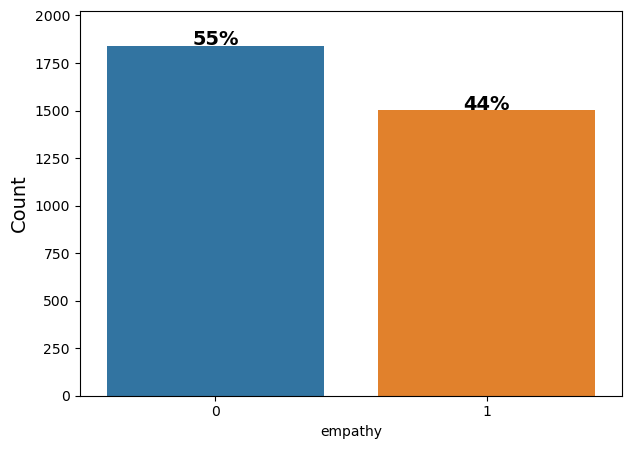

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [12]:
plot_class_frequencies(free_sac_features_df_test)

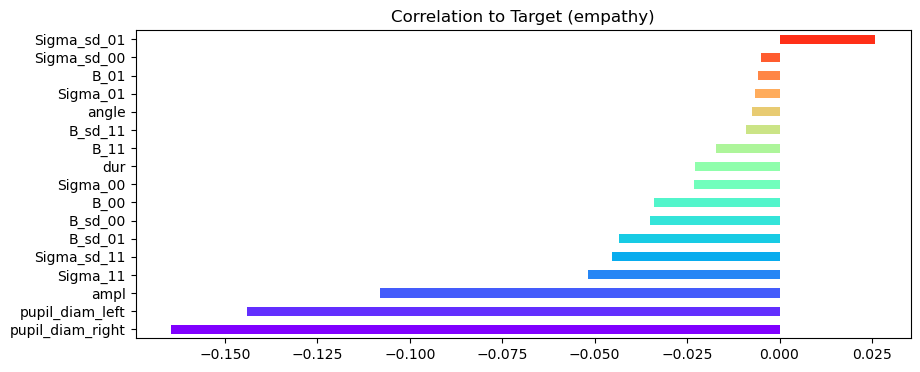


 Sigma_sd_01         0.025922
Sigma_sd_00        -0.004935
B_01               -0.005748
Sigma_01           -0.006680
angle              -0.007328
B_sd_11            -0.009137
B_11               -0.017117
dur                -0.022817
Sigma_00           -0.023230
B_00               -0.033835
B_sd_00            -0.034912
B_sd_01            -0.043370
Sigma_sd_11        -0.045268
Sigma_11           -0.051815
ampl               -0.108049
pupil_diam_left    -0.143924
pupil_diam_right   -0.164623
dtype: float64


In [13]:
plot_correlations(free_sac_features_df_train)

### __Cognitive empathy__

#### __Fixations__

In [14]:
free_fix_features_cog_train, free_fix_labels_cog_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
free_fix_features_cog_test, free_fix_labels_cog_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_fix_features_cog_df_train, free_fix_features_cog_df_test = get_df_features(free_fix_features_cog_train, free_fix_features_cog_test, free_fix_labels_cog_train, free_fix_labels_cog_test)
free_fix_features_cog_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


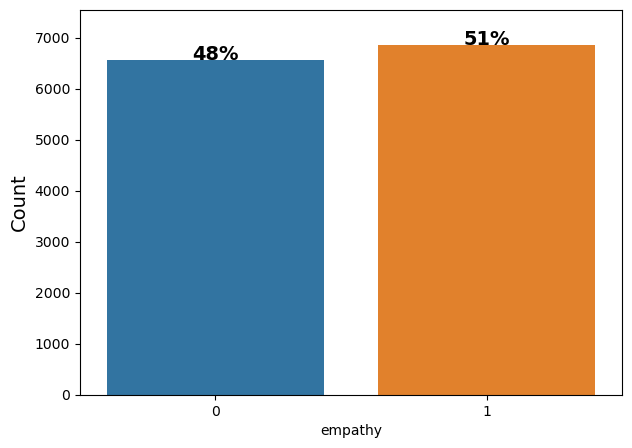

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [15]:
plot_class_frequencies(free_fix_features_cog_df_train)

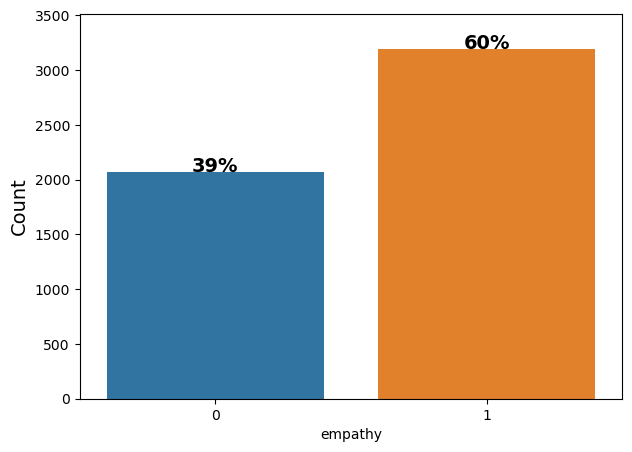

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [16]:
plot_class_frequencies(free_fix_features_cog_df_test)

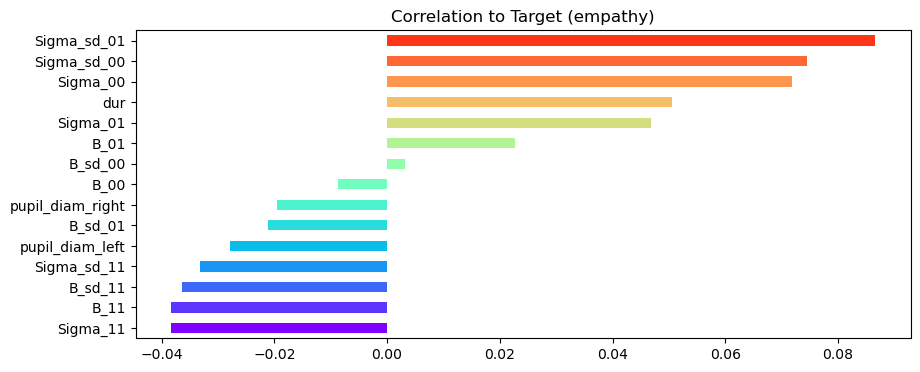


 Sigma_sd_01         0.086610
Sigma_sd_00         0.074495
Sigma_00            0.071843
dur                 0.050518
Sigma_01            0.046742
B_01                0.022609
B_sd_00             0.003137
B_00               -0.008752
pupil_diam_right   -0.019575
B_sd_01            -0.021144
pupil_diam_left    -0.027911
Sigma_sd_11        -0.033254
B_sd_11            -0.036300
B_11               -0.038328
Sigma_11           -0.038358
dtype: float64


In [17]:
plot_correlations(free_fix_features_cog_df_train)

#### __Saccades__

In [18]:
_, _ , free_sac_features_cog_train, free_sac_labels_cog_train = loader.get_eyeT_features_and_labels("train", "free", type="cognitive", normalize=False)
_, _, free_sac_features_cog_test, free_sac_labels_cog_test  = loader.get_eyeT_features_and_labels("test", "free", type= "cognitive", normalize=False)
free_sac_features_cog_df_train, free_sac_features_cog_df_test = get_df_features(free_sac_features_cog_train, free_sac_features_cog_test, free_sac_labels_cog_train, free_sac_labels_cog_test, fix= False)
free_sac_features_cog_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.267404,-0.062063,0.393935,0.221068,0.151942,0.334570,19043.765563,587.397127,28616.579086,11211.996583,330.729936,15666.190783,32.005383,66.037868,0.033333,3.750,3.550,1
1,4.038522,-3.252532,3.288455,1.096619,0.876793,1.418526,22345.768371,-628.266373,38460.514960,10108.553184,317.633896,17682.699687,-21.072727,116.811814,0.041667,3.590,3.720,1
2,0.977165,0.947107,3.275761,0.205921,0.259758,1.061665,1168.263115,93.573391,11337.827852,777.609148,84.195021,6031.143676,-153.239401,131.034347,0.050000,3.555,3.540,1
3,1.461892,1.101030,3.730387,0.597207,0.425156,1.521754,31678.815782,532.524847,19891.663734,14469.355813,351.189790,9287.743565,-146.633634,196.367003,0.083333,3.325,3.435,1
4,0.486348,-2.011505,10.964955,0.235941,0.593969,3.164296,50535.142650,-700.083689,8330.121751,18390.111825,230.441191,4819.837024,98.759701,321.753011,0.041667,3.385,3.260,1


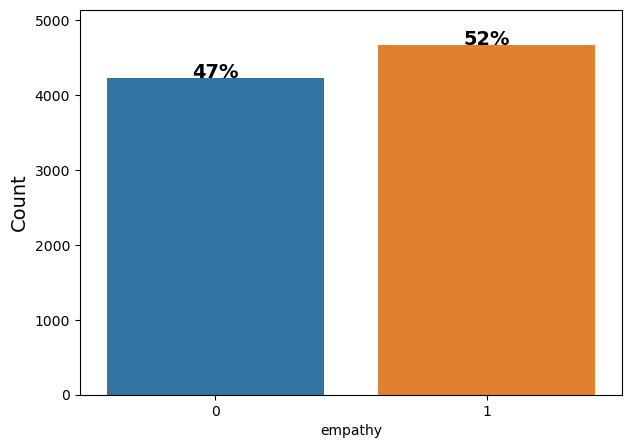

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [19]:
plot_class_frequencies(free_sac_features_cog_df_train)

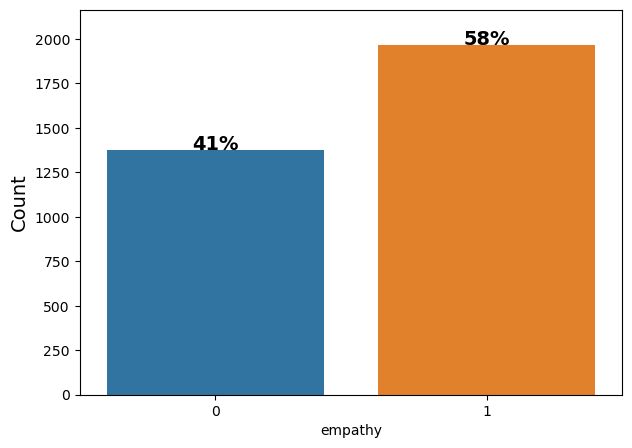

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [20]:
plot_class_frequencies(free_sac_features_cog_df_test)

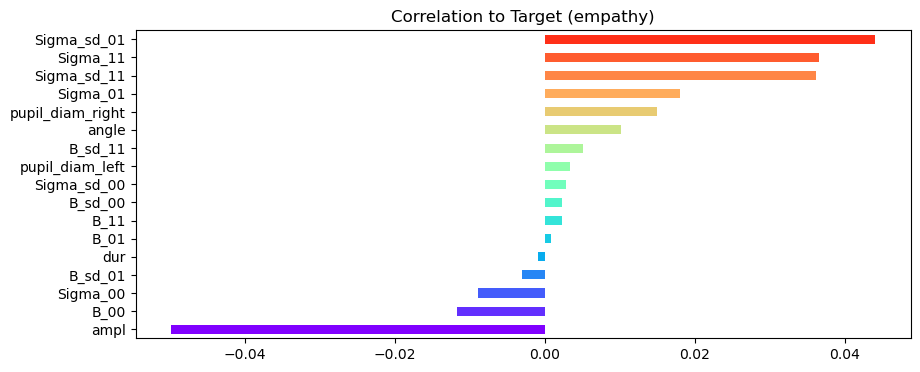


 Sigma_sd_01         0.044048
Sigma_11            0.036485
Sigma_sd_11         0.036173
Sigma_01            0.017958
pupil_diam_right    0.014877
angle               0.010114
B_sd_11             0.005125
pupil_diam_left     0.003280
Sigma_sd_00         0.002771
B_sd_00             0.002263
B_11                0.002255
B_01                0.000833
dur                -0.000930
B_sd_01            -0.003106
Sigma_00           -0.008969
B_00               -0.011669
ampl               -0.049866
dtype: float64


In [21]:
plot_correlations(free_sac_features_cog_df_train)

### __Affective empathy__

#### __Fixations__

In [22]:
free_fix_features_aff_train, free_fix_labels_aff_train, _, _  = loader.get_eyeT_features_and_labels("train", "free", type="affective", normalize=False)
free_fix_features_aff_test, free_fix_labels_aff_test, _, _  = loader.get_eyeT_features_and_labels("test", "free", type= "affective", normalize=False)
free_fix_features_aff_df_train, free_fix_features_aff_df_test = get_df_features(free_fix_features_aff_train, free_fix_features_aff_test, free_fix_labels_aff_train, free_fix_labels_aff_test)
free_fix_features_aff_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.105871,-0.037054,0.232171,0.081480,0.080110,0.190721,3823.563822,-206.042225,6403.093913,1226.764674,127.550142,2043.493732,0.441667,3.751667,3.835556,1
1,0.154466,-0.026128,0.144507,0.126765,0.071540,0.116430,5741.050163,261.729660,2105.989843,2215.439013,153.933511,778.195761,0.258333,3.666364,3.506364,1
2,0.116257,-0.026798,0.328797,0.102239,0.083171,0.273784,1789.284394,-169.214536,6205.734828,866.976425,104.523279,2946.153468,0.133333,3.520000,3.494000,1
3,0.177886,-0.055714,0.328176,0.145340,0.119993,0.276325,4678.502599,-255.982333,4484.312361,1818.250607,148.688630,1726.832742,0.241667,3.393000,3.340000,1
4,0.095387,-0.046825,0.367486,0.080938,0.090307,0.298531,4614.506400,-287.942638,1957.252188,1754.041876,132.601536,760.291256,0.233333,3.395556,3.356667,1


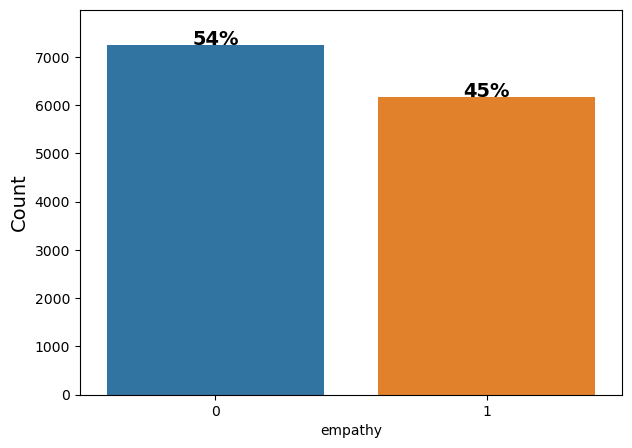

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [23]:
plot_class_frequencies(free_fix_features_aff_df_train)

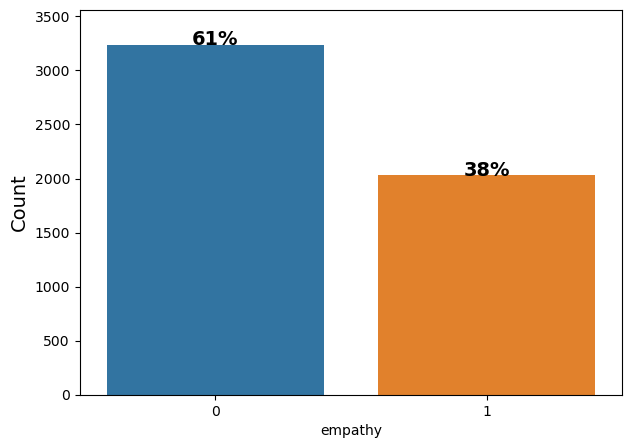

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [24]:
plot_class_frequencies(free_fix_features_aff_df_test)

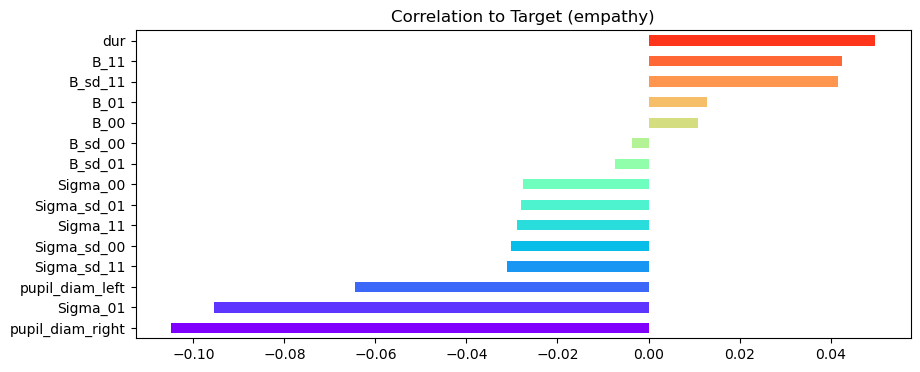


 dur                 0.049849
B_11                0.042569
B_sd_11             0.041634
B_01                0.012929
B_00                0.010809
B_sd_00            -0.003692
B_sd_01            -0.007403
Sigma_00           -0.027674
Sigma_sd_01        -0.028044
Sigma_11           -0.028925
Sigma_sd_00        -0.030166
Sigma_sd_11        -0.031172
pupil_diam_left    -0.064474
Sigma_01           -0.095431
pupil_diam_right   -0.104966
dtype: float64


In [25]:
plot_correlations(free_fix_features_aff_df_train)

#### __Saccades__

In [26]:
_, _ , free_sac_features_aff_train, free_sac_labels_aff_train = loader.get_eyeT_features_and_labels("train", "free", type="affective", normalize=False)
_, _, free_sac_features_aff_test, free_sac_labels_aff_test  = loader.get_eyeT_features_and_labels("test", "free", type= "affective", normalize=False)
free_sac_features_aff_df_train, free_sac_features_aff_df_test = get_df_features(free_sac_features_aff_train, free_sac_features_aff_test, free_sac_labels_aff_train, free_sac_labels_aff_test, fix= False)
free_sac_features_aff_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.267404,-0.062063,0.393935,0.221068,0.151942,0.334570,19043.765563,587.397127,28616.579086,11211.996583,330.729936,15666.190783,32.005383,66.037868,0.033333,3.750,3.550,1
1,4.038522,-3.252532,3.288455,1.096619,0.876793,1.418526,22345.768371,-628.266373,38460.514960,10108.553184,317.633896,17682.699687,-21.072727,116.811814,0.041667,3.590,3.720,1
2,0.977165,0.947107,3.275761,0.205921,0.259758,1.061665,1168.263115,93.573391,11337.827852,777.609148,84.195021,6031.143676,-153.239401,131.034347,0.050000,3.555,3.540,1
3,1.461892,1.101030,3.730387,0.597207,0.425156,1.521754,31678.815782,532.524847,19891.663734,14469.355813,351.189790,9287.743565,-146.633634,196.367003,0.083333,3.325,3.435,1
4,0.486348,-2.011505,10.964955,0.235941,0.593969,3.164296,50535.142650,-700.083689,8330.121751,18390.111825,230.441191,4819.837024,98.759701,321.753011,0.041667,3.385,3.260,1


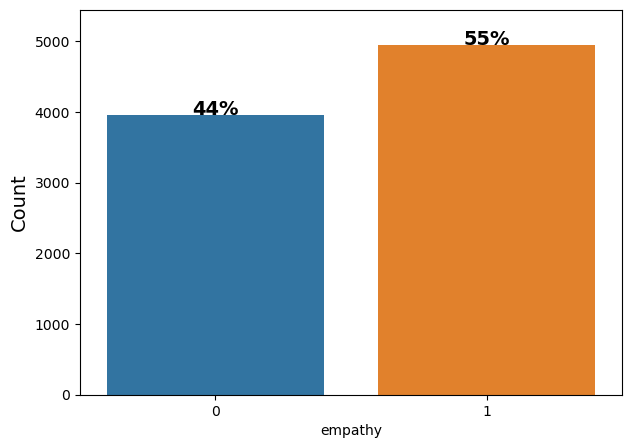

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [27]:
plot_class_frequencies(free_sac_features_aff_df_train)

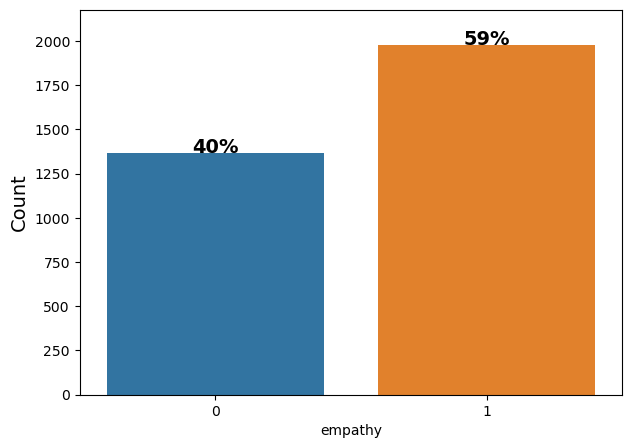

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [28]:
plot_class_frequencies(free_sac_features_aff_df_test)

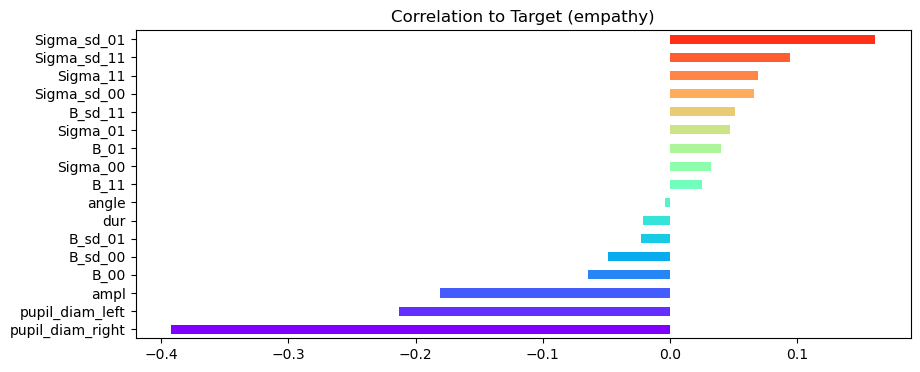


 Sigma_sd_01         0.161309
Sigma_sd_11         0.094516
Sigma_11            0.068865
Sigma_sd_00         0.066158
B_sd_11             0.051174
Sigma_01            0.047247
B_01                0.040170
Sigma_00            0.032285
B_11                0.025440
angle              -0.004305
dur                -0.020968
B_sd_01            -0.022621
B_sd_00            -0.048976
B_00               -0.064461
ampl               -0.180491
pupil_diam_left    -0.212952
pupil_diam_right   -0.392293
dtype: float64


In [29]:
plot_correlations(free_sac_features_aff_df_test)

## __Task oriented__

### __General empathy__

### __Fixations__

In [30]:
task_fix_features_train, task_fix_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
task_fix_features_test, task_fix_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_fix_features_df_train, task_fix_features_df_test = get_df_features(task_fix_features_train, task_fix_features_test, task_fix_labels_train, task_fix_labels_test)
task_fix_features_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.159111,-0.052830,1.424490,0.129403,0.189595,0.765556,981.338132,-67.893339,2711.174950,423.587804,85.885421,1144.184289,0.200000,3.453750,3.793750,1
1,0.061245,-0.032537,0.159855,0.046204,0.054504,0.130997,2366.154487,-197.724609,1918.878712,936.894501,90.426449,723.415637,0.250000,3.280909,3.444545,1
2,0.035920,-0.038115,0.452530,0.027932,0.066941,0.322537,1897.328271,-31.769430,3045.603990,658.355980,102.106911,1030.794922,0.341667,3.185000,3.335714,1
3,0.166975,-0.014598,0.056437,0.143414,0.043394,0.047483,2316.950504,61.853986,1840.292521,1068.878459,122.467444,806.554623,0.166667,3.114286,3.372857,1
4,0.090304,-0.022923,0.148850,0.078496,0.051161,0.126113,5173.486475,-246.887768,7364.090337,2230.684506,156.425251,3126.183012,0.183333,3.200000,3.441429,1


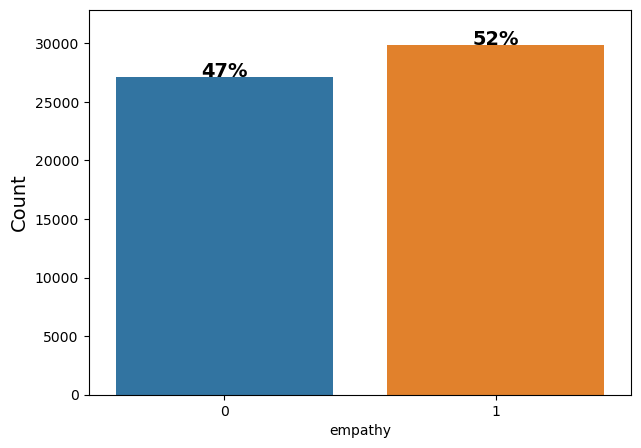

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [31]:
plot_class_frequencies(task_fix_features_df_train)

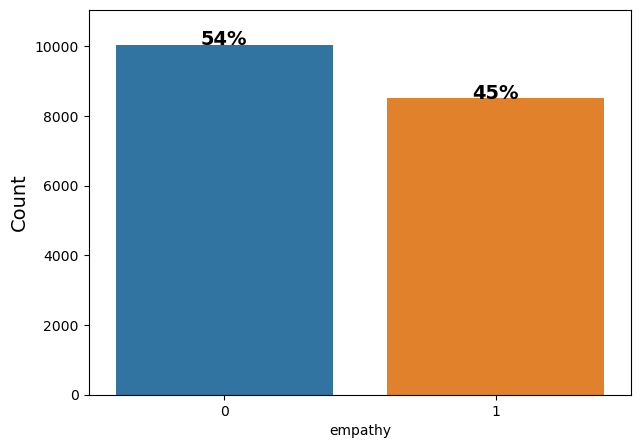

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [32]:
plot_class_frequencies(task_fix_features_df_test)

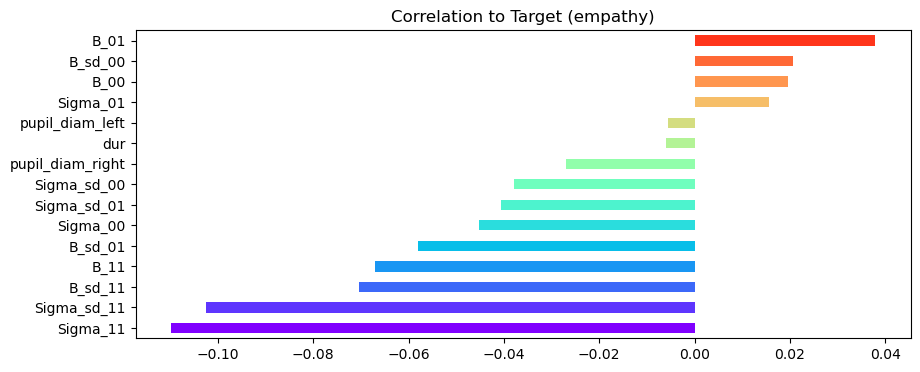


 B_01                0.037927
B_sd_00             0.020711
B_00                0.019568
Sigma_01            0.015542
pupil_diam_left    -0.005652
dur                -0.006044
pupil_diam_right   -0.027052
Sigma_sd_00        -0.037901
Sigma_sd_01        -0.040657
Sigma_00           -0.045250
B_sd_01            -0.058087
B_11               -0.067115
B_sd_11            -0.070432
Sigma_sd_11        -0.102585
Sigma_11           -0.109885
dtype: float64


In [33]:
plot_correlations(task_fix_features_df_train)

### __Saccades__

In [34]:
_, _, task_sac_features_train, task_sac_labels_train = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
_, _, task_sac_features_test, task_sac_labels_test = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_sac_features_df_train, task_sac_features_df_test = get_df_features(task_sac_features_train, task_sac_features_test, task_sac_labels_train, task_sac_labels_test, fix=False)
task_sac_features_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.354644,-0.306361,0.819852,0.252635,0.264591,0.704853,46034.583421,1003.268085,25493.131000,15578.629101,236.379249,9983.469284,62.414794,477.252554,0.075000,3.406667,3.743333,1
1,0.242181,-0.314134,0.637564,0.130797,0.167587,0.453416,48092.132471,1030.727968,34101.057722,16273.051562,232.794080,12515.215969,61.439605,822.029805,0.083333,3.377500,3.515000,1
2,1.080946,1.765714,6.930785,0.219026,0.361495,2.186966,2473.030467,111.815079,22017.925554,1690.440804,112.553907,9820.981484,-159.405910,176.264007,0.033333,3.260000,3.340000,1
3,13.345232,-3.876324,1.342911,5.288116,1.269643,0.647187,21502.987782,-605.085395,28224.484756,8301.575648,161.048605,10634.802499,-62.359659,857.906755,0.066667,3.240000,3.305000,1
4,0.012309,-0.069197,18.292512,0.009031,0.250405,11.370114,40742.589925,-653.973392,8951.781154,13878.936036,164.163320,3932.621479,129.568784,1053.368407,0.066667,3.336667,3.540000,1


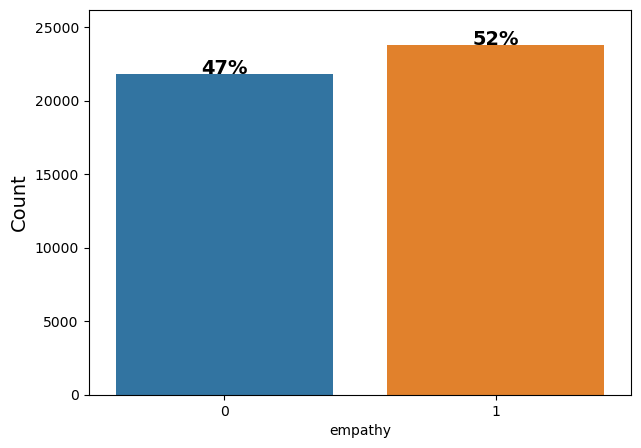

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [35]:
plot_class_frequencies(task_sac_features_df_train)

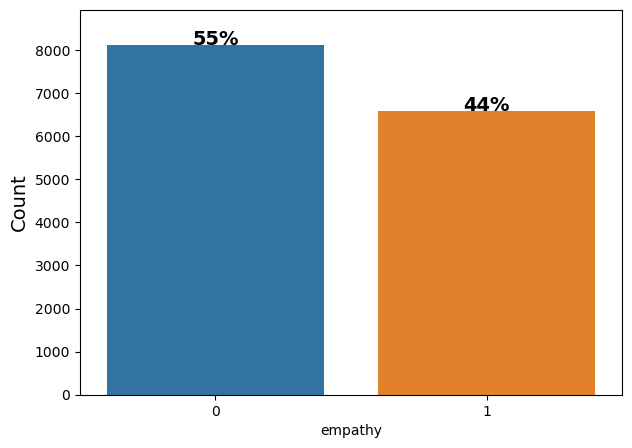

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [36]:
plot_class_frequencies(task_sac_features_df_test)

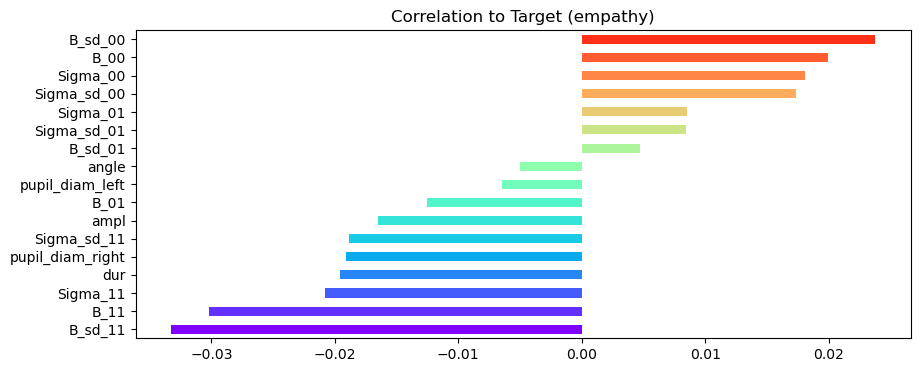


 B_sd_00             0.023789
B_00                0.019957
Sigma_00            0.018075
Sigma_sd_00         0.017363
Sigma_01            0.008500
Sigma_sd_01         0.008485
B_sd_01             0.004755
angle              -0.004977
pupil_diam_left    -0.006440
B_01               -0.012506
ampl               -0.016502
Sigma_sd_11        -0.018875
pupil_diam_right   -0.019081
dur                -0.019619
Sigma_11           -0.020757
B_11               -0.030158
B_sd_11            -0.033285
dtype: float64


In [37]:
plot_correlations(task_sac_features_df_train)

### __Cognitive empathy__

#### __Fixations__

In [38]:
task_fix_features_cog_train, task_fix_labels_cog_train, _, _  = loader.get_eyeT_features_and_labels("train", "task", type="cognitive", normalize=False)
task_fix_features_cog_test, task_fix_labels_cog_test, _, _  = loader.get_eyeT_features_and_labels("test", "task", type= "cognitive", normalize=False)
task_fix_features_cog_df_train, task_fix_features_cog_df_test = get_df_features(task_fix_features_cog_train, task_fix_features_cog_test, task_fix_labels_cog_train, task_fix_labels_cog_test)
task_fix_features_cog_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.159111,-0.052830,1.424490,0.129403,0.189595,0.765556,981.338132,-67.893339,2711.174950,423.587804,85.885421,1144.184289,0.200000,3.453750,3.793750,1
1,0.061245,-0.032537,0.159855,0.046204,0.054504,0.130997,2366.154487,-197.724609,1918.878712,936.894501,90.426449,723.415637,0.250000,3.280909,3.444545,1
2,0.035920,-0.038115,0.452530,0.027932,0.066941,0.322537,1897.328271,-31.769430,3045.603990,658.355980,102.106911,1030.794922,0.341667,3.185000,3.335714,1
3,0.166975,-0.014598,0.056437,0.143414,0.043394,0.047483,2316.950504,61.853986,1840.292521,1068.878459,122.467444,806.554623,0.166667,3.114286,3.372857,1
4,0.090304,-0.022923,0.148850,0.078496,0.051161,0.126113,5173.486475,-246.887768,7364.090337,2230.684506,156.425251,3126.183012,0.183333,3.200000,3.441429,1


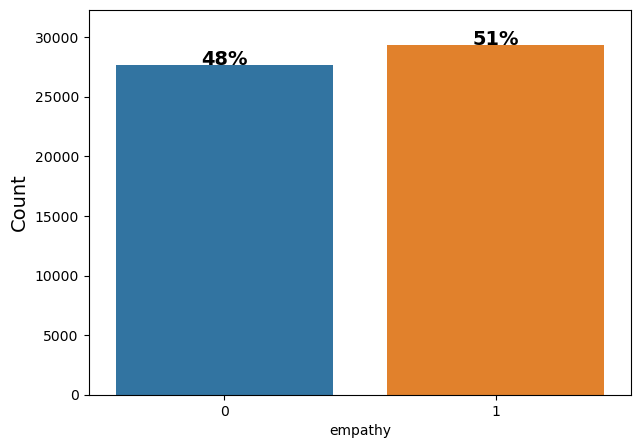

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [39]:
plot_class_frequencies(task_fix_features_cog_df_train)

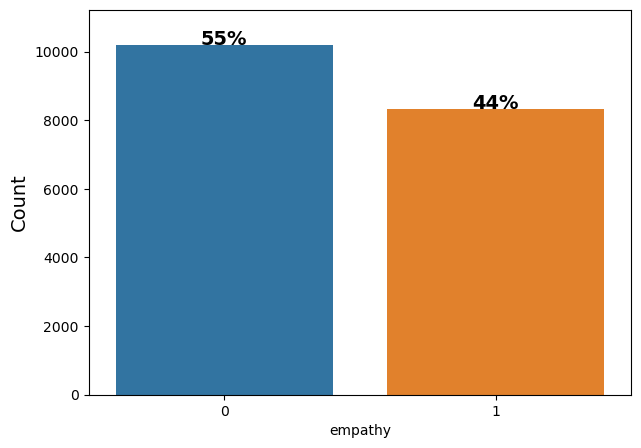

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [40]:
plot_class_frequencies(task_fix_features_cog_df_test)

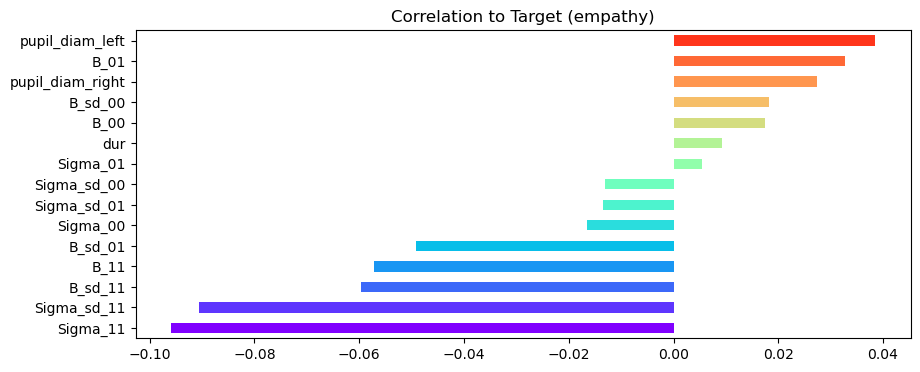


 pupil_diam_left     0.038525
B_01                0.032774
pupil_diam_right    0.027299
B_sd_00             0.018248
B_00                0.017416
dur                 0.009289
Sigma_01            0.005372
Sigma_sd_00        -0.013133
Sigma_sd_01        -0.013462
Sigma_00           -0.016428
B_sd_01            -0.049118
B_11               -0.057179
B_sd_11            -0.059583
Sigma_sd_11        -0.090599
Sigma_11           -0.095959
dtype: float64


In [41]:
plot_correlations(task_fix_features_cog_df_train)

#### __Saccades__

In [42]:
_, _, task_sac_cog_features_train, task_sac_cog_labels_train = loader.get_eyeT_features_and_labels("train", "task", type="cognitive", normalize=False)
_, _, task_sac_cog_features_test, task_sac_cog_labels_test = loader.get_eyeT_features_and_labels("test", "task", type = "cognitive", normalize=False)
task_sac_features_cog_df_train, task_sac_features_cog_df_test = get_df_features(task_sac_cog_features_train, task_sac_cog_features_test, task_sac_cog_labels_train, task_sac_cog_labels_test, fix=False)
task_sac_features_cog_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.354644,-0.306361,0.819852,0.252635,0.264591,0.704853,46034.583421,1003.268085,25493.131000,15578.629101,236.379249,9983.469284,62.414794,477.252554,0.075000,3.406667,3.743333,1
1,0.242181,-0.314134,0.637564,0.130797,0.167587,0.453416,48092.132471,1030.727968,34101.057722,16273.051562,232.794080,12515.215969,61.439605,822.029805,0.083333,3.377500,3.515000,1
2,1.080946,1.765714,6.930785,0.219026,0.361495,2.186966,2473.030467,111.815079,22017.925554,1690.440804,112.553907,9820.981484,-159.405910,176.264007,0.033333,3.260000,3.340000,1
3,13.345232,-3.876324,1.342911,5.288116,1.269643,0.647187,21502.987782,-605.085395,28224.484756,8301.575648,161.048605,10634.802499,-62.359659,857.906755,0.066667,3.240000,3.305000,1
4,0.012309,-0.069197,18.292512,0.009031,0.250405,11.370114,40742.589925,-653.973392,8951.781154,13878.936036,164.163320,3932.621479,129.568784,1053.368407,0.066667,3.336667,3.540000,1


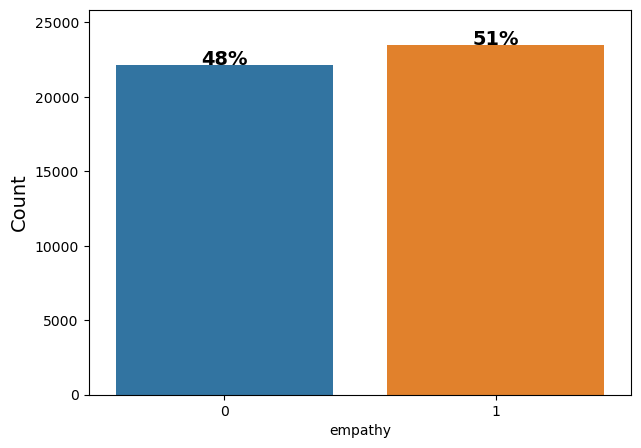

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [43]:
plot_class_frequencies(task_sac_features_cog_df_train)

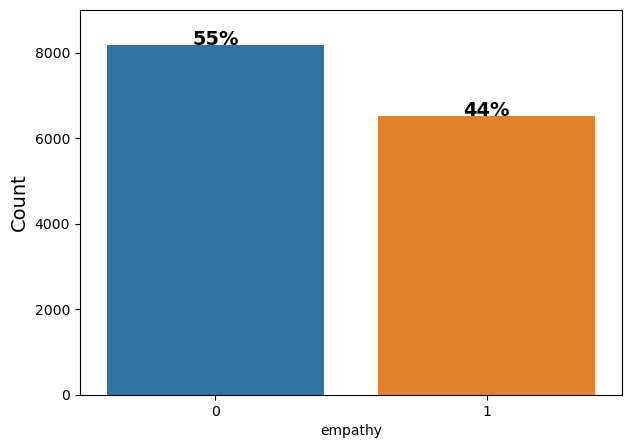

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [44]:
plot_class_frequencies(task_sac_features_cog_df_test)

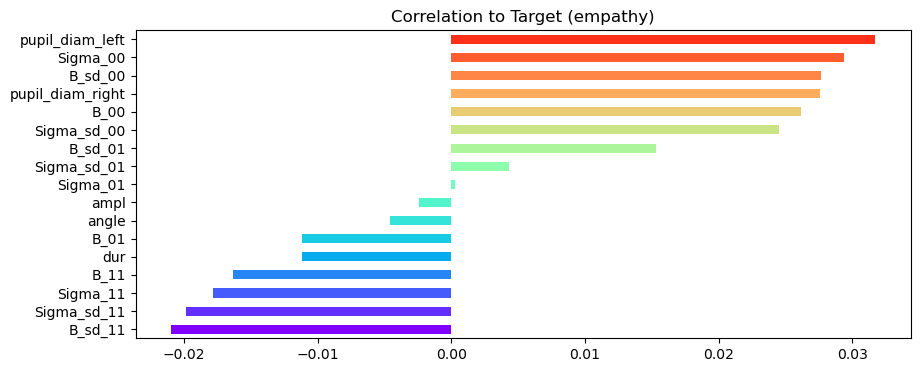


 pupil_diam_left     0.031738
Sigma_00            0.029412
B_sd_00             0.027704
pupil_diam_right    0.027607
B_00                0.026160
Sigma_sd_00         0.024530
B_sd_01             0.015343
Sigma_sd_01         0.004298
Sigma_01            0.000230
ampl               -0.002446
angle              -0.004579
B_01               -0.011156
dur                -0.011161
B_11               -0.016366
Sigma_11           -0.017818
Sigma_sd_11        -0.019896
B_sd_11            -0.021007
dtype: float64


In [45]:
plot_correlations(task_sac_features_cog_df_train)

### __Affective empathy__

### __Fixations__

In [46]:
task_fix_aff_features_train, task_fix_aff_labels_train, _, _  = loader.get_eyeT_features_and_labels("train", "task", normalize=False)
task_fix_aff_features_test, task_fix_aff_labels_test, _, _  = loader.get_eyeT_features_and_labels("test", "task", normalize=False)
task_fix_aff_df_train, task_fix_aff_df_test = get_df_features(task_fix_aff_features_train, task_fix_aff_features_test, task_fix_aff_labels_train, task_fix_aff_labels_test)
task_fix_aff_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.159111,-0.052830,1.424490,0.129403,0.189595,0.765556,981.338132,-67.893339,2711.174950,423.587804,85.885421,1144.184289,0.200000,3.453750,3.793750,1
1,0.061245,-0.032537,0.159855,0.046204,0.054504,0.130997,2366.154487,-197.724609,1918.878712,936.894501,90.426449,723.415637,0.250000,3.280909,3.444545,1
2,0.035920,-0.038115,0.452530,0.027932,0.066941,0.322537,1897.328271,-31.769430,3045.603990,658.355980,102.106911,1030.794922,0.341667,3.185000,3.335714,1
3,0.166975,-0.014598,0.056437,0.143414,0.043394,0.047483,2316.950504,61.853986,1840.292521,1068.878459,122.467444,806.554623,0.166667,3.114286,3.372857,1
4,0.090304,-0.022923,0.148850,0.078496,0.051161,0.126113,5173.486475,-246.887768,7364.090337,2230.684506,156.425251,3126.183012,0.183333,3.200000,3.441429,1


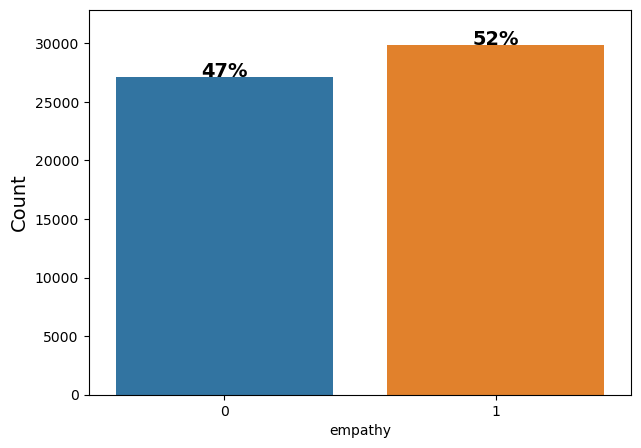

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [47]:
plot_class_frequencies(task_fix_aff_df_train)

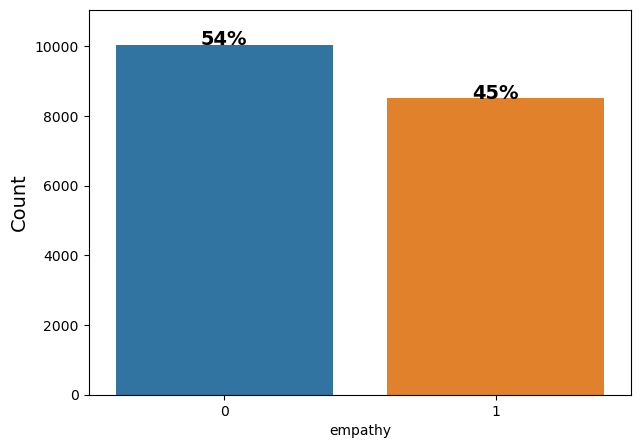

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [48]:
plot_class_frequencies(task_fix_aff_df_test)

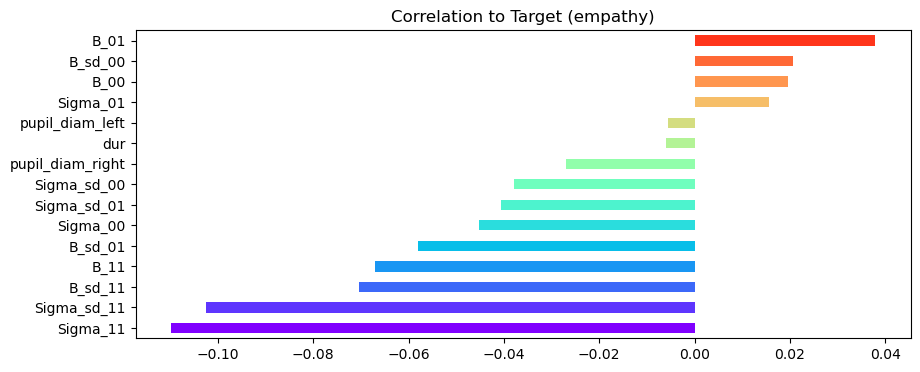


 B_01                0.037927
B_sd_00             0.020711
B_00                0.019568
Sigma_01            0.015542
pupil_diam_left    -0.005652
dur                -0.006044
pupil_diam_right   -0.027052
Sigma_sd_00        -0.037901
Sigma_sd_01        -0.040657
Sigma_00           -0.045250
B_sd_01            -0.058087
B_11               -0.067115
B_sd_11            -0.070432
Sigma_sd_11        -0.102585
Sigma_11           -0.109885
dtype: float64


In [49]:
plot_correlations(task_fix_aff_df_train)

### __Saccades__

In [50]:
_, _, task_sac_aff_features_train, task_sac_aff_labels_train = loader.get_eyeT_features_and_labels("train", "task", type="affective", normalize=False)
_, _, task_sac_aff_features_test, task_sac_aff_labels_test = loader.get_eyeT_features_and_labels("test", "task", type = "affective", normalize=False)
task_sac_features_aff_df_train, task_sac_features_aff_df_test = get_df_features(task_sac_aff_features_train, task_sac_aff_features_test, task_sac_aff_labels_train, task_sac_aff_labels_test, fix=False)
task_sac_features_aff_df_train.head()

,B_00,B_01,B_11,B_sd_00,B_sd_01,B_sd_11,Sigma_00,Sigma_01,Sigma_11,Sigma_sd_00,Sigma_sd_01,Sigma_sd_11,angle,ampl,dur,pupil_diam_left,pupil_diam_right,empathy
0,0.354644,-0.306361,0.819852,0.252635,0.264591,0.704853,46034.583421,1003.268085,25493.131000,15578.629101,236.379249,9983.469284,62.414794,477.252554,0.075000,3.406667,3.743333,1
1,0.242181,-0.314134,0.637564,0.130797,0.167587,0.453416,48092.132471,1030.727968,34101.057722,16273.051562,232.794080,12515.215969,61.439605,822.029805,0.083333,3.377500,3.515000,1
2,1.080946,1.765714,6.930785,0.219026,0.361495,2.186966,2473.030467,111.815079,22017.925554,1690.440804,112.553907,9820.981484,-159.405910,176.264007,0.033333,3.260000,3.340000,1
3,13.345232,-3.876324,1.342911,5.288116,1.269643,0.647187,21502.987782,-605.085395,28224.484756,8301.575648,161.048605,10634.802499,-62.359659,857.906755,0.066667,3.240000,3.305000,1
4,0.012309,-0.069197,18.292512,0.009031,0.250405,11.370114,40742.589925,-653.973392,8951.781154,13878.936036,164.163320,3932.621479,129.568784,1053.368407,0.066667,3.336667,3.540000,1


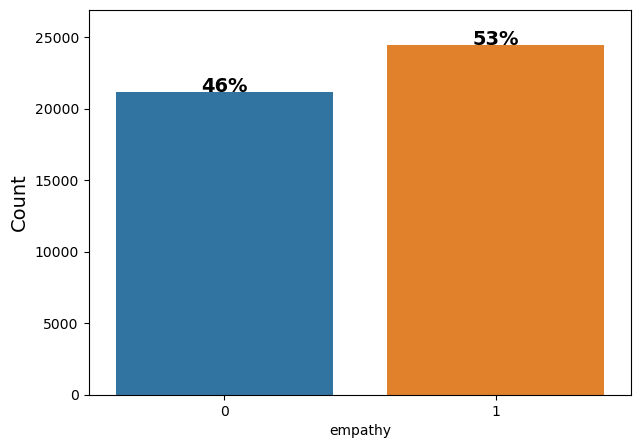

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [51]:
plot_class_frequencies(task_sac_features_aff_df_train)

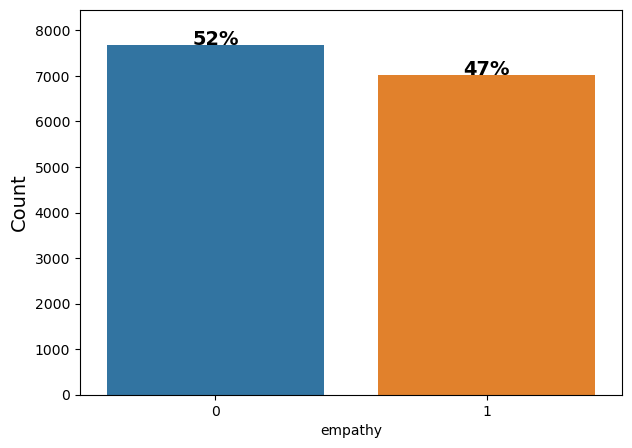

<AxesSubplot: xlabel='empathy', ylabel='Count'>

In [52]:
plot_class_frequencies(task_sac_features_aff_df_test)

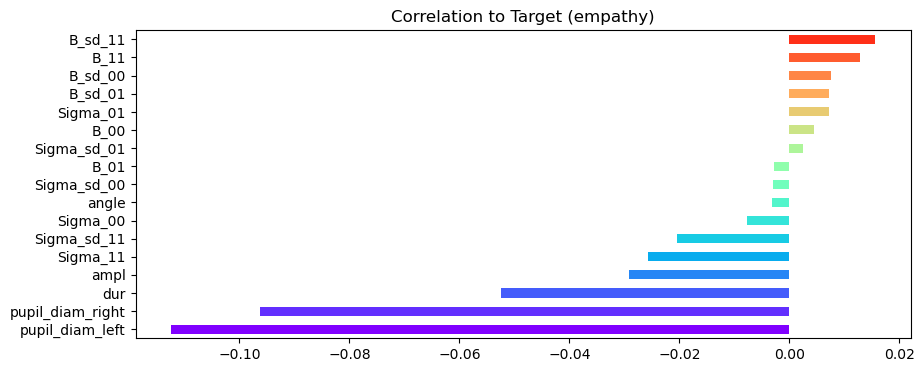


 B_sd_11             0.015614
B_11                0.012833
B_sd_00             0.007479
B_sd_01             0.007196
Sigma_01            0.007141
B_00                0.004500
Sigma_sd_01         0.002397
B_01               -0.002731
Sigma_sd_00        -0.002999
angle              -0.003260
Sigma_00           -0.007756
Sigma_sd_11        -0.020480
Sigma_11           -0.025650
ampl               -0.029161
dur                -0.052484
pupil_diam_right   -0.096283
pupil_diam_left    -0.112471
dtype: float64


In [53]:
plot_correlations(task_sac_features_aff_df_train)